<a href="https://colab.research.google.com/github/gizdatalab/SGD_11_Tracking_Colombia/blob/main/Tracking_SDG_11_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prerequiaries to execute GEE Code


In [2]:
%%capture
!pip install  geemap
!pip install folium
#!pip install ipyleaflet

In [3]:
!earthengine authenticate 

Instructions for updating:
non-resource variables are not supported in the long term
To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=BdMPsAlw5LmiBwj6oztVBkA_Utw1AOfOZYNk2_xNdt4&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/1AY0e-g4zt1TwMNf6Q6Crn4u-hKA2Me7o19xoUrk936_lL6mqTtc8SqNWUiY

Successfully saved authorization token.


In [4]:
# Import, authenticate and initialize the Earth Engine library.
import ee
import geemap
try:
    ee.Initialize()
except Exception as e:
    ee.Authenticate()
    ee.Initialize()

# Indicator 11.3.1: Ratio of land consumption rate to population growth rate
## Target 11.3: By 2030, enhance inclusive and sustainable urbanization and capacity for participatory, integrated and sustainable human settlement planning and management in all countries
### Goal 11: Make cities and human settlements inclusive, safe, resilient and sustainable

## Concepts and definitions
### Definition:
The indicator is defined as the ratio of land consumption rate to population growth rate.
This indicator requires defining the two components of population growth and land consumption rate.
Computing the population growth rate is more straightforward and more readily available, while land
consumption rate is slightly challenging, and requires the use of new techniques. In estimating the land
consumption rate, one needs to define what constitutes “consumption” of land since this may cover
aspects of “consumed” or “preserved” or available for “development” for cases such as land occupied by
wetlands. Secondly, there is not one unequivocal measure of whether land that is being developed is
truly “newly-developed” (or vacant) land, or if it is at least partially “redeveloped”. As a result, the
percentage of current total urban land that was newly developed (consumed) will be used as a measure
of the land consumption rate. The fully developed area is also sometimes referred to as built up area.


### Concepts:
**City or urban area:**
Since 2016 UN-Habitat and partners organized global consultations and discussions to
narrow down the set of meaningful definitions that would be helpful for the global monitoring and
reporting process. Following consultations with 86 member states, the United Nations Statistical
Commission, in its 51st Session (March 2020) endorsed the Degree of Urbanisation (DEGURBA) as a
workable method to delineate cities, urban and rural areas for international statistical comparisons.1
This
definition combines population size and population density thresholds to classify the entire territory of a
country along the urban-rural continuum, and captures the full extent of a city, including the dense
neighbourhoods beyond the boundary of the central municipality. DEGURBA is applied in a two-step
process: First, 1 km2 grid cells are classified based on population density, contiguity and population size.
Subsequently, local units are classified as urban or rural based on the type of grid cells in which majority
of their population resides. For the computation of indicator 11.3.1, countries are encouraged to adopt
the degree of urbanisation to define the analysis area (city or urban area).  
  
**Population growth rate (PGR)**
is the change of a population in a defined area (country, city, etc) during a
period, usually one year, expressed as a percentage of the population at the start of that period. It
reflects the number of births and deaths during a period and the number of people migrating to and from
the focus area. In SDG 11.3.1, this is computed at the area defined as urban/city.  
  
**Land consumption** within the context of indicator 11.3.1 is defined as the uptake of land by urbanized
land uses, which often involves conversion of land from non-urban to urban functions.  
  
**Land consumption rate** is the rate at which urbanized land or land occupied by a city/urban area changes
during a period of time (usually one year), expressed as a percentage of the land occupied by the
city/urban area at the start of that time.   
  
**Built up** area within the context of indicator 11.3.1 is defined as all areas occupied by buildings.

### Data Availability
Description:  
This indicator is categorized under Tier II, meaning the indicator is conceptually clear and an established methodology exists but data on many countries is not yet available. The indicator’s rapid adoption by countries since 2015 has resulted in increased production of data at the local level, while activities of UN-Habitat and partners in the earth observation field are significantly contributing to availability of baseline data for the indicator. For example, using global datasets such as the <mark>Global Human Settlement Layer (GHSL)</mark>, the World Settlement Footprint (WSF), the Gridded Population of the World (GPW), WorldPop dataset, the High Resolution Settlement Layer (HRSL) among others can help attain global estimates for the indicator. While some of these datasets have limitations in their application to track city level trends, their wide coverage provides a useful resource for the indicator computation. Higher resolution data is continuously being produced by countries, which are supported by organizations working in the earth observation and geospatial information field of expertise. More than 1,500 cities from more than 80 countries have data at the right resolution required for the indicator computation.

https://unstats.un.org/sdgs/metadata/files/Metadata-11-03-01.pdf

## Methodology

**Computation Method:**  

The method to compute ratio of land consumption rate to population growth rate follows five broad
steps:

1.   Deciding on the analysis period/years
2.   Delimitation of the urban area or city which will act as the geographical scope for the analysis
3.  Spatial analysis and computation of the land consumption rate
4.   Spatial analysis and computation of the population growth rate
5. Computation of the ratio of land consumption rate to population growth rate
6. Computation of recommended secondary indicators


### A. **Deciding on the analysis period/years**   
This step involves selecting the time period during which the measurement of the indicator will be
undertaken. Since this indicator considers historical growth of urban areas, <mark>analysis can be done </mark>annually,
 <mark>in 5-year cycles</mark> or 10-year cycles. Cycles of 5 or 10 years are commended, especially where use of mid-tohigh resolution satellite imagery is used to extract data on built up areas, which is used to compute the
land consumption rate component of the indicator. UN-Habitat and partners have been creating a
repository of some data on this indicator using 1990 as the baseline year. Countries can however
compute the indicator as far as back as satellite imagery is available (1975 for Landsat free imagery) and
can maintain the <mark>current/most recent year as the final reporting year</mark>. 

In [31]:
start = 2010
end = 2015

def print_perc(x):
    print(round(x*100,2),'%')

Area of interest

In [6]:
# specify the area of interest - country boundaries colombia from the FAO datase
AOI = ee.Geometry.Point(-75.6,6.2);
adminArea = ee.FeatureCollection("FAO/GAUL/2015/level0")\
                        .filterBounds(AOI)   

#adminArea = ee.FeatureCollection("FAO/GAUL/2015/level1")\
#                        .filterBounds(AOI)   

In [7]:
scale_senti = 100

In [11]:
# plot zones
Map = geemap.Map(center=[-75.6,6.2], zoom=10)
Map.setCenter(-75.6,6.2);

Map.addLayer(adminArea, {}, 'area of interest');
Map

### B. **Delimitation of the urban area or city which will act as the spatial analysis scope**  
Urban areas and cities grow in different ways, the most common of which include infill (new
developments within existing urban areas resulting in densification), extension (new developments at the
edge of existing urban areas), leapfrogging (new urban threshold developments which are not attached
to the urban area but which are functionally linked) and inclusion (engulfing of outlying urban clusters or
leapfrog developments into the urban area, often forming urban conurbations). Key to note also is that
growth of urban areas is not always positive. Sometimes, negative growth can be recorded, such as
where disasters (e.gs floods, earthquakes) result in collapse of buildings and/or reduction in the built-up
area mass.
Understanding the spatial growth of urban areas requires two important pre-requisites: a) delimitation of
an appropriate spatial analysis scope which captures the entire urban fabric (as opposed to just the
administratively defined boundaries), and b) use of a growth tracking measurement that helps
understand when both positive and negative growth happen. For the former, a harmonized urban
area/city definition approach which allows for consistent analysis is recommended, while the use of built
up areas is recommended for the latter since it allows for measurement of both positive and negative
urban growth.
Following consultations with 86 member states, the United Nations Statistical Commission in its 51st
Session (March 2020) endorsed the <mark>Degree of Urbanisation (DEGURBA) as a workable method to
delineate cities, urban and rural areas for international statistical comparisons</mark>. Countries are thus
encouraged to adopt this approach, which will help them produce data that is comparable across urban
areas within their territories, as well as with urban areas and cities in other countries. More details on
DEGURBA are available here: https://unstats.un.org/unsd/statcom/51st-session/documents/BG-Item3j-Recommendation-E.pdf 

#### Degree of Urbanisation 
** HARMONISED GLOBAL DEFINITION OF CITIES AND SETTLEMENTS**  
https://data.jrc.ec.europa.eu/dataset/jrc-ghsl-ghs_smod_pop_globe_r2016a

Several new global agendas call for the collection of harmonised indicators for cities, urban and rural areas. Because no harmonised method to delineate these areas is available, indicators rely on national definitions, which vary considerably and thus limit international comparability.

The 2030 Agenda for Sustainable Development, the New Urban Agenda and the global strategy to improve agricultural and rural statistics contain calls for the collection of harmonised indicators for cities and urban and rural areas to support consistent international comparisons across countries.

This new method, called the Degree of Urbanisation, classifies the entire territory of a country into three classes:

1.   cities
2.   towns and semi-dense areas
3.   rural areas


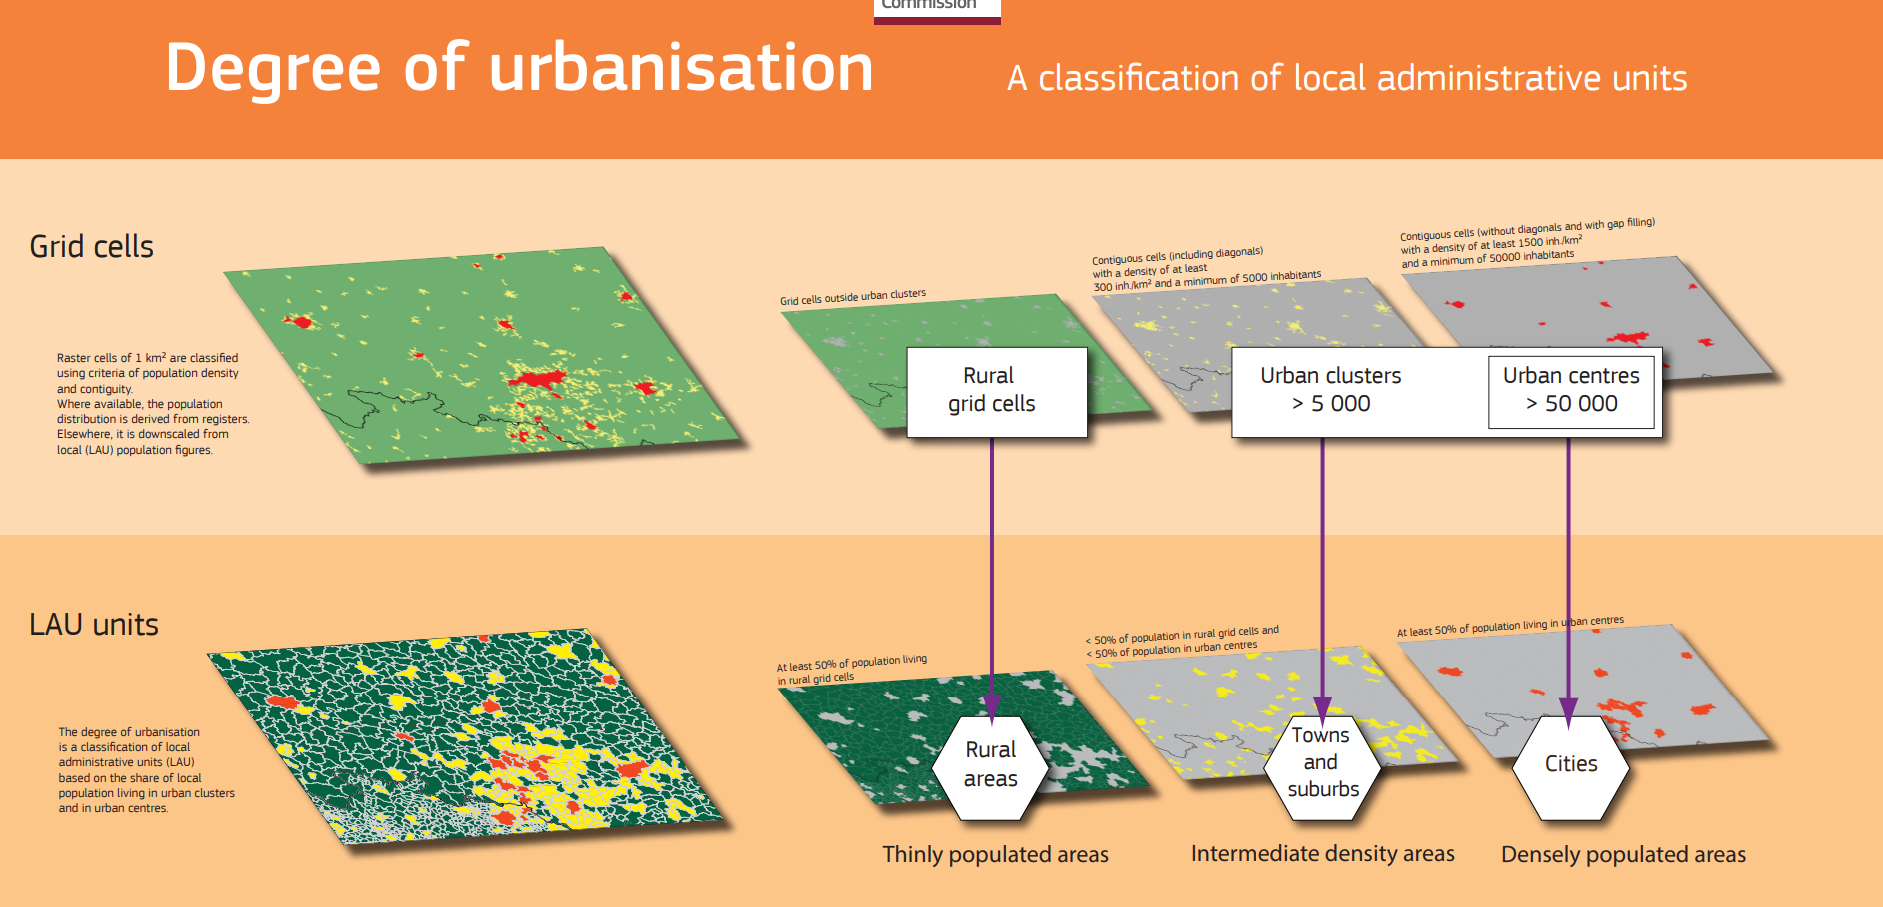

In [19]:
# load degree of urbanization map from EU JRC
# https://ghsl.jrc.ec.europa.eu/degurba.php

degreeOfUrbanization = ee.ImageCollection("JRC/GHSL/P2016/SMOD_POP_GLOBE_V1")\
                          .filter(ee.Filter.date('2015-01-01', '2015-01-15'))\
                          .select('smod_code') \
                          .filterBounds(adminArea)\
                          .mosaic()\
                          .clip(adminArea)

In [21]:
# plot zones
Map = geemap.Map(center=[-75.6,6.2], zoom=10)

visParams = {
  'min': 1.0,
  'max': 3.0,
  'palette': ['FCE202', 'F58D00', 'F51300'],
}
Map.setCenter(-75.6,6.2);
Map.add_basemap('ESRI')
Map.addLayer(degreeOfUrbanization.mask(degreeOfUrbanization.gt(0)), visParams, 'cities / towns and semi-dense areas / rural areas 2015');
Map

*For the analysis we only use the units towns and suburbs and cities.*

In [22]:
# Create a binary mask.
mask_urb = degreeOfUrbanization.gt(1);

# Update the composite mask with the water mask.
degreeOfUrbanization = degreeOfUrbanization.updateMask(mask_urb);

### C. **Spatial analysis and computation of the land consumption rate (LCR)**  
  
Using the urban boundaries defined in step (2), spatial analysis is undertaken to determine the land
consumption rate. To implement this, the three steps below are followed:
1. From satellite imagery, extract data on built up areas for each analysis year
2. Calculate the total area covered by the built-up areas for each of the analysis years
3. Compute the (annual) land consumption rate using the formula:


$  LCR = \frac{V_{present} + V_{past}}  {V_{past}} * \frac{1}{T}$

$V_{present}$ is total built up area in current year  
$V_{past}$  is total built up area in past year  
$V_{T}$  is the number of years between   $V_{present}$  and $V_{past}$  (or length in years of the period
considered)

#### Data GHSL- Built-Up Grid 1975-1990-2000-2015
https://developers.google.com/earth-engine/datasets/catalog/JRC_GHSL_P2016_BUILT_LDSMT_GLOBE_V1

1	|	Water surface  
2	|	Land no built-up in any epoch  
3	|	Built-up from 2000 to 2014 epochs    
4	|	Built-up from 1990 to 2000 epochs  
5	|	Built-up from 1975 to 1990 epochs  
6	|	built-up up to 1975 epoch

In [12]:
# Built-up area from the Global Human Settlement Layer opf the JRC
builtUpGHSL = ee.Image("JRC/GHSL/P2016/BUILT_LDSMT_GLOBE_V1").select('built').clip(adminArea)
# select the Multitemporal built-up presence layer

In [13]:

# get the area that was built-up in 2000 from the "Multitemporal built-up presence" layer = past period                
TotalBuiltUp_2015 = builtUpGHSL.gt(3).updateMask(builtUpGHSL.gt(3))
TotalBuiltUp_2000 = builtUpGHSL.gt(4).updateMask(builtUpGHSL.gt(4))
TotalBuiltUp_1990 = builtUpGHSL.gt(5).updateMask(builtUpGHSL.gt(5))

                                    #//.lt(6).updateMask(builtUpGHSL.lt(6))
                                    #.multiply(ee.Image.pixelArea().divide(10000));//hectares


Share of Build-up space comapared to urban area

In [32]:
TotalBuiltUp_2015_mask = builtUpGHSL.gt(3).updateMask(mask_urb)
VV = TotalBuiltUp_2015_mask.reduceRegion( ee.Reducer.mean(),adminArea,scale= scale_senti,maxPixels=1e12).getInfo()['built']
print_perc(VV)

20.17 %


In [33]:
TotalBuiltUp_2000_mask = builtUpGHSL.gt(4).updateMask(mask_urb)
VV = TotalBuiltUp_2000_mask.reduceRegion( ee.Reducer.mean(),adminArea,scale= scale_senti,maxPixels=1e12).getInfo()['built']
print_perc(VV)

18.07 %


In [34]:
TotalBuiltUp_1990_mask = builtUpGHSL.gt(5).updateMask(mask_urb)
VV = TotalBuiltUp_1990_mask.reduceRegion( ee.Reducer.mean(),adminArea,scale= scale_senti,maxPixels=1e12).getInfo()['built']
print_perc(VV)

18.07 %


In [23]:
palette_bu = ['ffffff'	,'ff6f5c'	,'00A6BD',	'33C68A','ffe4b2']

In [27]:
# plot zones
Map = geemap.Map(center=[6.2,-75.6], zoom=12)
Map.add_basemap('ESRI')

Map.addLayer(TotalBuiltUp_2015_mask,{'palette':palette_bu[:2]}, '2015');
Map.addLayer(TotalBuiltUp_2000,{'palette':palette_bu[2]}, '2000');
Map.addLayer(TotalBuiltUp_1990,{'palette':palette_bu[3]}, '1990');

Map

#### LCR

2015

*In the UN methodology proposal PGR is calculated as log, while LCR is not. We propose to use either log for PGR and LCR or none of them.* 

In [35]:
import numpy as np

V_present = TotalBuiltUp_2015.reduceRegion( ee.Reducer.sum(),adminArea,scale= scale_senti,maxPixels=1e12).getInfo()['built']
V_past = TotalBuiltUp_2000.reduceRegion( ee.Reducer.sum(),adminArea,scale= scale_senti,maxPixels=1e12).getInfo()['built']
T =  2015 - 2000

# UN stats recomendation
LCR_15 = (V_present - V_past)/V_past * 1/T
print_perc(LCR_15)
# We use logarithm to be consistent with population growth
LCR_15 = np.log(V_present/ V_past) * 1/T
print_perc(LCR_15)

1.16 %
1.07 %


2000

In [36]:
V_present = TotalBuiltUp_2000.reduceRegion( ee.Reducer.sum(),adminArea,scale= scale_senti,maxPixels=1e12).getInfo()['built']
V_past = TotalBuiltUp_1990.reduceRegion( ee.Reducer.sum(),adminArea,scale= scale_senti,maxPixels=1e12).getInfo()['built']
T =  2000-1990

LCR_00 = np.log(V_present/ V_past) * 1/T
print_perc(LCR_00)

0.0 %


### D. Spatial analysis and computation of the **population** growth rate (PGR)
Using the urban boundaries defined in step (2), calculate the total population within the urban area in
each of the analysis years where the land consumption rate is computed. Population data collected by
National Statistical Offices through censuses and other surveys should be used for this analysis. Where
this type of population data is not available, or where data is released at large population units which
exceed the defined urban area, countries are encouraged to create population grids, which can help
disaggregate the data from large and different sized census/ population data release units to smaller
uniform sized grids.
The (annual) population growth rate is calculated using the total population within the urban area for the
analysis period using the formula below:

$  PGR = LN(Pop_{present} + Pop_{past})  * \frac{1}{T}$

$LN$ is the natural logarithm value  
$Pop_{present}$  is the total population within the urban area/city in the past/initial year  
$Pop_{past}$  n is the total population within the urban area/city in the current/final year  

$T$ is the number of years between   $Pop_{present}$  and $Pop_{past}$  (or length in years of the period
considered)

#### JRC Global Human Settlement Layer

In [37]:
pop_1990 = ee.Image(ee.ImageCollection('JRC/GHSL/P2016/POP_GPW_GLOBE_V1')\
                  .filter(ee.Filter.date('1990-01-01', '1990-12-31'))\
                  .select('population_count')\
                  .reduce(ee.Reducer.mean())).clip(adminArea).updateMask(mask_urb)

pop_2000 = ee.Image(ee.ImageCollection('JRC/GHSL/P2016/POP_GPW_GLOBE_V1')\
                  .filter(ee.Filter.date('2000-01-01', '2000-12-31'))\
                  .select('population_count')\
                  .reduce(ee.Reducer.mean())).clip(adminArea).updateMask(mask_urb)

pop_2015 = ee.Image(ee.ImageCollection('JRC/GHSL/P2016/POP_GPW_GLOBE_V1')\
                  .filter(ee.Filter.date('2015-01-01', '2015-12-31'))\
                  .select('population_count')\
                  .reduce(ee.Reducer.mean())).clip(adminArea).updateMask(mask_urb)



*We use the log of the population for better visualisation only. The percentiles are used to set min / max for visualisation*

In [39]:
abundance_perc = pop_2015.log().reduceRegion(ee.Reducer.percentile([5,  50, 95]), adminArea, 1000)
print(abundance_perc.getInfo())

{'population_count_mean_p5': 2.038947753095146, 'population_count_mean_p50': 4.718680556569689, 'population_count_mean_p95': 7.158747924804707}


In [40]:
palette = ['ffffff','e8f3f6','d2e7ee','bcdbe6','a6d0de','90c4d6','7ab8ce','64adc6','4ea1be','3895b6','228aae','1e7c9c','1b6e8b','176079','145268','114557','0d3745','0a2934']

populationCountVis = {
  'min': 2.0,
  'max': 7.5,
  'palette': palette[::-1],
};
# Medellin [6.2,-75.6]
#Bogota [4.7968,-74.1660]
Map = geemap.Map(center=[6.2,-75.6], zoom=12)
Map.add_basemap('ESRI')
#Map.add_basemap('3DEP Elevation')
Map.addLayer(pop_1990.log(), populationCountVis, 'Population Count_1990');
Map.addLayer(pop_2000.log(), populationCountVis, 'Population Count_2000');
Map.addLayer(pop_2015.log(), populationCountVis, 'Population Count_2015');
Map

#### PGR

2015

In [42]:
import numpy as np
Pop_present = pop_2015.reduceRegion( ee.Reducer.sum(),adminArea,scale= scale_senti,maxPixels=1e12).getInfo()['population_count_mean']
Pop_past = pop_2000.reduceRegion( ee.Reducer.sum(),adminArea,scale= scale_senti,maxPixels=1e12).getInfo()['population_count_mean']
T =  2015 -2000

PGR_15 = np.log(Pop_present/ Pop_past) * 1/T
print_perc(PGR_15)

1.23 %


2000

In [43]:
import numpy as np
Pop_present = pop_2000.reduceRegion( ee.Reducer.sum(),adminArea,scale= scale_senti,maxPixels=1e12).getInfo()['population_count_mean']
Pop_past = pop_1990.reduceRegion( ee.Reducer.sum(),adminArea,scale= scale_senti,maxPixels=1e12).getInfo()['population_count_mean']
T =  2000 -1990

PGR_00 = np.log(Pop_present/ Pop_past) * 1/T
print_perc(PGR_00)

1.68 %


### E. Computation of the ratio of land consumption rate to population growth rate
The ratio of land consumption rate (LCRPGR) to population growth rate is calculated using the formula: 

$ LCRPGR = \frac {Land consumption rate}{Population growth rate} $

The analysis years for both the land consumption rate and the population growth rate should be the
same.

In [44]:
LCRPGR_15 = LCR_15 / PGR_15
print_perc(LCRPGR_15)

86.9 %


Interpretation: 

*  '>1 decreasing population density (change BU > change pop)
*  < 1 increasing population density (change BU < change pop)

In [45]:
LCRPGR_00 = LCR_00 / PGR_00
print_perc(LCRPGR_00)

0.05 %


To visualize the the dynamics of population of build-up spaces on pixel level, one need to reformulate the equation. 

This indicator will hardly capture the dynamics of cities with negative a zero or negative
growth of population or for those which lost part of its territories due to a natural
catastrophe or a conflict. Moreover, the “urban area” is defined as the surface that
includes the built-up area and the open urban space. A consensus on the definition of
the urban area and its delimitation has still to be reached in order to define the indicator,
due to the variety of the existing definitions and methods. (source: https://ghsl.jrc.ec.europa.eu/documents/LUE_User_Guide.pdf)

#### E1. Land Use Efficiency
To overcome these difficulties, it has been proposed to adapt the formulation of the Land
Use Efficiency (LUE) indicator in order to measure the «change rate of the built-up
are per capita» (Corbane et al. 2016):

$ Idx_t = \frac{Y_t-Y_{t+n}}{Y_t}$
  
  where
    
$Y_t = \frac{BU_t}{POP_t} $  
  
  The LUE indicator can be estimated with different time intervals (i.e. every 5, 10, 15
years) upon the availability of the observations. In order to ensure the comparability of
the results at different times, it is recommended to normalise the values to obtain the
variation a 10-year average change which divides the indicator by n (the number of
years that separate the observations) and then multiply by 10. The formula of the
normalised indicator is:   
  
 $ Idx_t = \frac{Y_t-Y_{t+n}}{Y_t} * \frac{10}{n}$

In [46]:
Y_15 = TotalBuiltUp_2015.divide(pop_2015) #qm per person
Y_00 = TotalBuiltUp_2000.divide(pop_2000) #
Y_90 = TotalBuiltUp_1990.divide(pop_1990) #
LUE_15 = (Y_00.subtract(Y_15)).divide(Y_00).multiply(ee.Number(10).divide(ee.Number(2015).subtract(ee.Number(2000))))
LUE_00 = (Y_90.subtract(Y_00)).divide(Y_90).multiply(ee.Number(10).divide(ee.Number(2000).subtract(ee.Number(1990))))



If we reverse the formula for $ Y_t$ we can interprete the result as population density.

In [47]:
Z_15 = pop_2015.divide(TotalBuiltUp_2015) # population density
Z_00 = pop_2000.divide(TotalBuiltUp_2000) #
Z_90 = pop_1990.divide(TotalBuiltUp_1990) #
PDE_15 = (Z_15.subtract(Z_00)).divide(Z_00).multiply(ee.Number(10).divide(ee.Number(2015).subtract(ee.Number(2000))))
PDE_00 = (Z_00.subtract(Z_90)).divide(Z_90).multiply(ee.Number(10).divide(ee.Number(2000).subtract(ee.Number(1990))))



Lets plot!

In [48]:
abundance_perc = PDE_00.reduceRegion(ee.Reducer.percentile([5,  50, 95]), adminArea, 1000)
print(abundance_perc.getInfo())

{'population_count_mean_p5': -0.09347886736014736, 'population_count_mean_p50': 0.1550025632617186, 'population_count_mean_p95': 0.7827224624910611}


In [49]:
adminArea1 = ee.FeatureCollection("FAO/GAUL/2015/level1")\
                        .filterBounds(AOI) 
adminArea2 = ee.FeatureCollection("FAO/GAUL/2015/level2")\
                        .filterBounds(adminArea1)  

In [50]:
no = ['0: >-100%','1: >-75%','2: >-50%','3: >-25%','4: <25%','5: <50%','6: <75%','7: <100%']
color_pal_1 = ['D35400','F39C12','F39C12','F1C40F','dbff56','27AE60','16A085','1ABC9C']
ld1 = dict(zip(no,color_pal_1))

In [51]:
no = ['0: -100%','1: -75%','2: -50%','3: -25%','4: 0%','5: 25%','6: 50%','7: 75%','8: 100%']
color_pal_2 = ['e55b5b','ea7b7b','f2adad','f7cdcd','ffffff','ffe39f','ffd56f','ffc73e','ffb90f']

ld2 = dict(zip(no,color_pal_2))

In [52]:
populationCountVis1 = {
  'min': 3,
  'max': 8,
  'palette': color_pal_1,
};

populationCountVis2 = {
  'min': -1,
  'max': 1,
  'palette': color_pal_2,
};

Map = geemap.Map(center=[6.2,-75.6], zoom=12)
Map.add_basemap('ESRI')
#Map.add_basemap('3DEP Elevation')

Map.addLayer(pop_2015.log(), populationCountVis, 'Population 2015',False);
Map.addLayer(pop_2015.log(), populationCountVis, 'Population 2015',False);
Map.addLayer(pop_2000.log(), populationCountVis, 'Population 2000',False);
Map.addLayer(TotalBuiltUp_2015, {'palette':palette_bu}, 'Build up 2015',False);
Map.addLayer(TotalBuiltUp_2000, {'palette':palette_bu[2]}, 'Build up 2000',False);
#Map.addLayer(Y_pre, populationCountVis1, 'Pop / BU 2015',False);
#Map.addLayer(Y_pas, populationCountVis1, 'Pop / BU 2000',False);
Map.addLayer(LUE_15, populationCountVis2, 'LUE');
Map.addLayer(PDE_15, populationCountVis2, 'PDE');
#Map.addLayer(adminArea1,{})
#Map.addLayer(adminArea2,{})

Map.add_legend(legend_title='Legend', legend_dict=ld2, position='bottomright')
Map

### f. Computation of recommended secondary indicators
There are two important secondary indicators which help interpret the value of the main indicator -
LGRPGR, thus helping in better understanding the nature of urban growth in each urban area. Both
indicators use the same input data as the LCRPGR and will thus not require additional work by countries.
These are: 

#### 1. Built-up area per capita   
– which is a measure of the average amount of built-up area available to
each person in an urban area during each analysis year. This indicator can help identify when
urban areas become too dense and/or when they become too sparsely populated. It is computed
by dividing the total built-up area by the total urban population within the urban area/city at a
given year, using the formula below:

𝐁𝐮𝐢𝐥𝐭 − 𝐮𝐩 𝐚𝐫𝐞𝐚 𝐩𝐞𝐫 𝐜𝐚𝐩𝐢𝐭𝐚 (𝐦𝟐/𝐩𝐞𝐫𝐬𝐨𝐧) = (
𝐔𝐫𝐁𝐔𝐭
𝐏𝐨𝐩𝐭
)

Where
UrBUt is the total built-up area/city in the urban area in time t (in square meters)
Popt is the population in the urban area in time t


In [53]:
Bu_per_capita = (V_present*1000)/Pop_present

#### 2. Total change in built up area 
– which is a measure of the total increase in built up areas within
the urban area over time. When applied to a small part of an urban area, such as the core city (or
old part of the urban area), this indicator can be used to understand densification trends in
urban areas. It is measured using the same inputs as the land consumption rate for the different
analysis years, based on the below formula: 

𝐓𝐨𝐭𝐚𝐥 𝐜𝐡𝐚𝐧𝐠𝐞 𝐢𝐧 𝐛𝐮𝐢𝐥𝐭 𝐮𝐩 𝐚𝐫𝐞𝐚 (%) =
(𝐔𝐫𝐁𝐔𝐭+𝐧 − 𝐔𝐫𝐁𝐔𝐭
)
𝐔𝐫𝐁𝐔t

Where
UrBUt +n is the total built-up area in the urban area/city in time the current/final year
UrBUt is the total built-up area in the urban area/city in time the past/initial year

In [55]:
print_perc((V_present - V_past)/V_past)

0.01 %


### g. Disaggregation:
Potential Disaggregation:  
 
*   Disaggregation by location (operational urban area vs administratively defined urban area, urban wide
vs intra-urban growth trends)
*    Disaggregation by type of growth (infill, expansion, leapfrogging)   
*    Disaggregation by city type (large vs medium sized vs small)
*    Disaggregation by type of land use consumed by the urbanization process 

### g. Predict buildup

In [64]:
proj = ee.Projection('EPSG:32618');

cnn_city = ee.ImageCollection('users/ghsl/S2_CNN')\
              .mosaic()\
              .select(['b1'],['city'])\
              .reproject(proj)\
              .clip(adminArea).updateMask(mask_urb)



def layerMasked (layer): 
  return layer.updateMask(layer.gte(50))

colors = [ 'yellow', 'orange', 'red'];
S2_BANDS = [ 'B2',  'B3',   'B4', 'B8'];
STD_NAMES = ['blue', 'green', 'red', 'nir'];
MOD_NAMES = ['blue_p20', 'green_p20', 'red_p20', 'nir_p20'];

def maskS2clouds(image): 
  qa = image.select('QA60');

  #// Bits 10 and 11 are clouds and cirrus, respectively.
  cloudBitMask = 1 << 10;
  cirrusBitMask = 1 << 11;

  #// Both flags should be set to zero, indicating clear conditions.
  mask = qa.bitwiseAnd(cloudBitMask).eq(0).And(qa.bitwiseAnd(cirrusBitMask).eq(0));

  return image.updateMask(mask) #;//.divide(1000)

S2 = ee.Image(ee.ImageCollection("COPERNICUS/S2")
                          .filterDate('2017-12-01', '2018-11-30')
                          .map(maskS2clouds) #// add better cloud/shadow mask
                          .filter(ee.Filter.lte('CLOUDY_PIXEL_PERCENTAGE', 30))
                          .filterBounds(adminArea)
                          .select(S2_BANDS, STD_NAMES)
                          .reduce(ee.Reducer.percentile([20]))
                          .round()
                          .toUint16()).updateMask(mask_urb)
                          
S2 = S2.select('red_p20', 'green_p20', 'blue_p20','nir_p20').clip(adminArea).updateMask(mask_urb)
S2 = S2.addBands(cnn_city.gt(40));


In [65]:
training = S2.stratifiedSample(region=adminArea,numPoints=2000,classBand='city',scale=1000,tileScale=16)
test = S2.sample(region=adminArea,numPixels=1500,scale=1000,tileScale=16)

In [72]:
%%time
classifier = ee.Classifier.smileRandomForest(10).train(features= training,  classProperty= 'city', inputProperties= MOD_NAMES)
trainAccuracy = classifier.confusionMatrix();
validated = test.classify(classifier);
print('Resubstitution error matrix: ', trainAccuracy.getInfo());
#print('Training overall accuracy: ', trainAccuracy.accuracy().getInfo())
#testAccuracy = validated.errorMatrix('city', 'classification');
#print('Resubstitution error matrix: ', testAccuracy.getInfo());
#print('Test overall accuracy: ', testAccuracy.accuracy().getInfo())

EEException: ignored

In [ ]:

trainAccuracy = classifier.confusionMatrix();
validated = test.classify(classifier);
print('Resubstitution error matrix: ', trainAccuracy.getInfo());
print('Training overall accuracy: ', trainAccuracy.accuracy().getInfo())
testAccuracy = validated.errorMatrix('city', 'classification');
print('Resubstitution error matrix: ', testAccuracy.getInfo());
print('Test overall accuracy: ', testAccuracy.accuracy().getInfo())

#// Define a palette for the Land Use classification.
palette = [
  'D3D3D3', #// urban (0)  // grey
  '2f5288', #// rural (1)  // blue
];
palette2 = [
  'D3D3D3', #// urban (0)  // grey
  '649568', #// rural (1)  // green
];
#//print(validated)
classified = S2.select(MOD_NAMES).classify(classifier);

Map = geemap.Map(center=[4.7968,-74.1660], zoom=11)
#/ Define visualization parameters for a true color image.
Map.addLayer(S2, {'bands': ['red_p20', 'green_p20', 'blue_p20'], 'gain': '0.1, 0.1, 0.11'}, "S2_composite_2018", True); 
Map.addLayer (cnn_city, {min: 20, max: 100, 'palette': palette}, 'Land Use_2018', False);
Map.addLayer(classified, {min: 0.0, max: 1, 'palette': palette2}, 'Land Use_2018_pred');
Map